In [1]:
import pandas as pd

# we restrict this (very large) dataset to the variables of interest
# choosing just the columns of intereest from this very very large dataset - look at GSS_Codebook
# this entire file will not upload to GitHub
# reading in only the columns of of interest - reading fiction comparing to happiness
columns = ['id', 'year', 'age', 'sex', 'race', 'degree', 'realrinc', 'region', 'readfict', 'news', 'litread', 'happy']
df = pd.read_stata("GSS7218_R1.dta", columns=columns)

# further limit dataset to the years we are interested in
df = df.loc[df['year'].isin({1998, 2000, 2002})]
print(df.head)

<bound method NDFrame.head of          id  year   age     sex   race          degree   realrinc  \
35284     1  1998  60.0    male  white     HIGH SCHOOL  31005.000   
35285     2  1998  27.0  female  white  JUNIOR COLLEGE  11196.000   
35286     3  1998  36.0    male  white     HIGH SCHOOL  56842.000   
35287     4  1998  21.0    male  white     HIGH SCHOOL  11196.000   
35288     5  1998  35.0  female  white        bachelor  31005.000   
...     ...   ...   ...     ...    ...             ...        ...   
43693  2761  2002  22.0    male  white  LT HIGH SCHOOL  14860.375   
43694  2762  2002  46.0    male  white        bachelor        NaN   
43695  2763  2002  85.0  female  white     HIGH SCHOOL        NaN   
43696  2764  2002  75.0    male  black     HIGH SCHOOL        NaN   
43697  2765  2002  46.0    male  white     HIGH SCHOOL  42234.750   

                region readfict               news litread         happy  
35284  W. SOU. CENTRAL      yes                NaN     NaN  PRETTY

In [2]:
# limit dataset to exclude records from individuals who refused
# to report their income
# eliminates any responses where this field was left empty
# can be done multiple times to filter for different factors
df = df.loc[df['realrinc'].notnull()]
print(df.head)

<bound method NDFrame.head of          id  year   age     sex   race          degree   realrinc  \
35284     1  1998  60.0    male  white     HIGH SCHOOL  31005.000   
35285     2  1998  27.0  female  white  JUNIOR COLLEGE  11196.000   
35286     3  1998  36.0    male  white     HIGH SCHOOL  56842.000   
35287     4  1998  21.0    male  white     HIGH SCHOOL  11196.000   
35288     5  1998  35.0  female  white        bachelor  31005.000   
...     ...   ...   ...     ...    ...             ...        ...   
43690  2758  2002  45.0    male  white     HIGH SCHOOL   4067.050   
43691  2759  2002  22.0  female  white     HIGH SCHOOL   8603.375   
43692  2760  2002  43.0  female  white     HIGH SCHOOL  13296.125   
43693  2761  2002  22.0    male  white  LT HIGH SCHOOL  14860.375   
43697  2765  2002  46.0    male  white     HIGH SCHOOL  42234.750   

                region readfict               news litread         happy  
35284  W. SOU. CENTRAL      yes                NaN     NaN  PRETTY

In [3]:
# REALITY CHECK, using GSS provided values
df.loc[df['year'] == 2000, 'realrinc'].astype(float).min() == 333;
round(df.loc[df['year'] == 2000, 'realrinc'].astype(float).mean(), 2) == 22110.13;
print(df.head)

# accounting for inflation (CPI) and using math to standardize reported income by adjusting for inflation
# inflation measured via US Consumer Price Index (CPI), source:
# http://www.dlt.ri.gov/lmi/pdf/cpi.pdf
cpi2015_vs_1986 = 236.7 / 109.6
# assert - takes realrinc as a float and adjusts to dataframe
# unlikely to do this for purposes of this class.
assert df['realrinc'].astype(float).median() < 24000  # reality check
df['realrinc2015'] = cpi2015_vs_1986 * df['realrinc'].astype(float)
print(df.head)

<bound method NDFrame.head of          id  year   age     sex   race          degree   realrinc  \
35284     1  1998  60.0    male  white     HIGH SCHOOL  31005.000   
35285     2  1998  27.0  female  white  JUNIOR COLLEGE  11196.000   
35286     3  1998  36.0    male  white     HIGH SCHOOL  56842.000   
35287     4  1998  21.0    male  white     HIGH SCHOOL  11196.000   
35288     5  1998  35.0  female  white        bachelor  31005.000   
...     ...   ...   ...     ...    ...             ...        ...   
43690  2758  2002  45.0    male  white     HIGH SCHOOL   4067.050   
43691  2759  2002  22.0  female  white     HIGH SCHOOL   8603.375   
43692  2760  2002  43.0  female  white     HIGH SCHOOL  13296.125   
43693  2761  2002  22.0    male  white  LT HIGH SCHOOL  14860.375   
43697  2765  2002  46.0    male  white     HIGH SCHOOL  42234.750   

                region readfict               news litread         happy  
35284  W. SOU. CENTRAL      yes                NaN     NaN  PRETTY

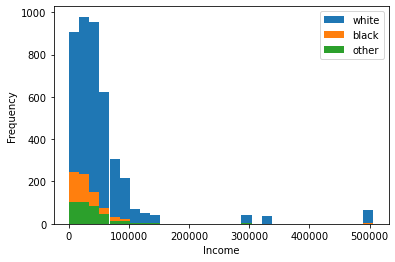

In [4]:
# continuing use of groupby


import matplotlib.pyplot as plt
df.groupby('race')['realrinc2015'].plot(kind='hist', bins=30)
plt.xlabel('Income')
plt.legend();

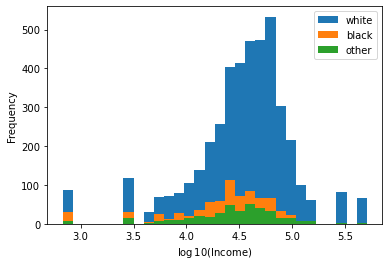

In [6]:
import numpy as np

# running log 10 of income
# reducing scale logrithmically to see where income is actually clustered

df['realrinc2015_log10'] = np.log10(df['realrinc2015'])
df.groupby('race')['realrinc2015_log10'].plot(kind='hist', bins=30)
plt.xlabel(r'$\log10(\mathrm{Income})$')
plt.legend();

In [7]:
# can work with anything numerical within the data frame

print(df['realrinc2015'].max() / df['realrinc2015'].min())
print(df['realrinc2015'].mean())
print(df['realrinc2015'].median())

749.1342599999999
51296.74902490707
37160.92814781022


In [8]:
# Filter
# Need to look at options available in the frame
# What are the answer choices for the field
# getting the stats by degree by year
# also returns the number in the data file (size)

df_bachelor = df[df['degree'] == 'bachelor']
# observed=True instructs pandas to ignore categories
# without any observations
df_bachelor.groupby(['year', 'degree'], observed=True)['realrinc2015'].agg(['size', 'mean', 'median'])

,,size,mean,median
year,degree,,,
1998,bachelor,363,63805.508302,48359.364964
2000,bachelor,344,58819.407571,46674.821168
2002,bachelor,307,85469.227956,50673.992929


In [10]:
# can sample based on any variable 
# first filter for readfict is not empty
# sampling 8 random records - will produce new sample every time it runs

# changing the yes/no variable to numeric
# can be very useful for ordinal data scaled by very, somewhat, etc. 

readfict_sample = df.loc[df['readfict'].notnull()].sample(8)['readfict']

readfict_sample = readfict_sample.replace(['no', 'yes'], [0, 1])
print(readfict_sample)

print("Mean:", readfict_sample.mean())
print("Median:", readfict_sample.median())

41586    1
41799    1
35598    1
37857    1
36644    1
37919    0
37800    0
41318    0
Name: readfict, dtype: int64
Mean: 0.625
Median: 1.0


In [11]:
# returning income by degree
# pure pivot table!
# demonstrating the income value of education

df.groupby('degree')['realrinc2015'].mad().round()

degree
LT HIGH SCHOOL    19551.0
HIGH SCHOOL       23568.0
JUNIOR COLLEGE    33776.0
bachelor          45055.0
graduate          77014.0
Name: realrinc2015, dtype: float64

In [12]:
# putting this with reading fiction habits
# shows that reading fiction does not help income

df_bachelor_or_more = df[df['degree'].isin(['bachelor', 'graduate'])]
df_bachelor_or_more.groupby(['degree', 'readfict'], observed=True)['realrinc2015'].mad().round()

degree    readfict
bachelor  yes          48908.0
          no          119523.0
graduate  yes          82613.0
          no          133028.0
Name: realrinc2015, dtype: float64

In [13]:
# I cannot figure out why this one is different

df_bachelor_or_more.groupby(['degree', 'readfict'], observed=True)['realrinc2015'].mean().round()

degree    readfict
bachelor  yes          71251.0
          no          139918.0
graduate  yes         113125.0
          no          153961.0
Name: realrinc2015, dtype: float64

In [14]:
# using different variables

df_bachelor_or_more.groupby(['happy', 'readfict'], observed=True)['realrinc2015'].mean().round()

happy          readfict
VERY HAPPY     yes         107718.0
               no          159788.0
PRETTY HAPPY   yes          73977.0
               no          124923.0
NOT TOO HAPPY  yes          58916.0
               no          206463.0
Name: realrinc2015, dtype: float64

In [16]:
 
df_bachelor_or_more.groupby(['happy', 'news'], observed=True)['realrinc2015'].mean().round()

happy          news             
VERY HAPPY     everyday             117783.0
               FEW TIMES A WEEK      76890.0
               ONCE A WEEK           70954.0
               LESS THAN ONCE WK     65605.0
               never                 69112.0
PRETTY HAPPY   everyday              89573.0
               FEW TIMES A WEEK      62526.0
               ONCE A WEEK           62832.0
               LESS THAN ONCE WK     49020.0
               never                 45331.0
NOT TOO HAPPY  everyday              58423.0
               FEW TIMES A WEEK      50821.0
               ONCE A WEEK           40893.0
               LESS THAN ONCE WK    129695.0
               never                110277.0
Name: realrinc2015, dtype: float64

In [18]:
# looking at number of categories and number of observations
# this is not based on the dataset but based on these groups entered here
# demonstrates that actual count not alwasys helpful, but ration within the data is

group1 = ['high school', 'high school', 'high school', 'high school', 'high school',
          'high school', 'bachelor', 'bachelor']
group2 = ['lt high school', 'lt high school', 'lt high school', 'lt high school',
          'high school', 'junior college', 'bachelor', 'graduate']
group3 = ['lt high school', 'lt high school', 'high school', 'high school',
          'junior college', 'junior college', 'bachelor', 'graduate']

# calculate the number of unique values in each group
print([len(set(group)) for group in [group1, group2, group3]])
# calculate the ratio of observed categories to total observations
print([len(set(group)) / len(group) for group in [group1, group2, group3]])

[2, 5, 5]
[0.25, 0.625, 0.625]
